<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/notebooks/InitialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SETUP REPOSITORY
!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git

fatal: destination path 'PythonForMachineLearning' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Biases and assumptions


-Longer flight will be more expensive

-Business flights will be more expensive than
Economical one

-Business flights will be faster than economical one, but they also will flew longer distances.

-There will be more economical flights


#Related work:


##Flight Fare Prediction | 10 ML Models
https://www.kaggle.com/code/varunsaikanuri/flight-fare-prediction-10-ml-models

This work focused on predicting price based on features. It was done in python jupiter.
Autor tested multiple regression models like:
- Linear
- Decision Tree
- Extra Regression Tree
- Random Forest
- KNN
- Ridge
- Lasso

The best results gave Extra Trees

##AirLinePrice-Regression
https://www.kaggle.com/code/nimapourmoradi/airlineprice-regression




#Preparing Data

##Loading Data

In [ ]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
data1=data.copy()
data.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


##Distribution of Data

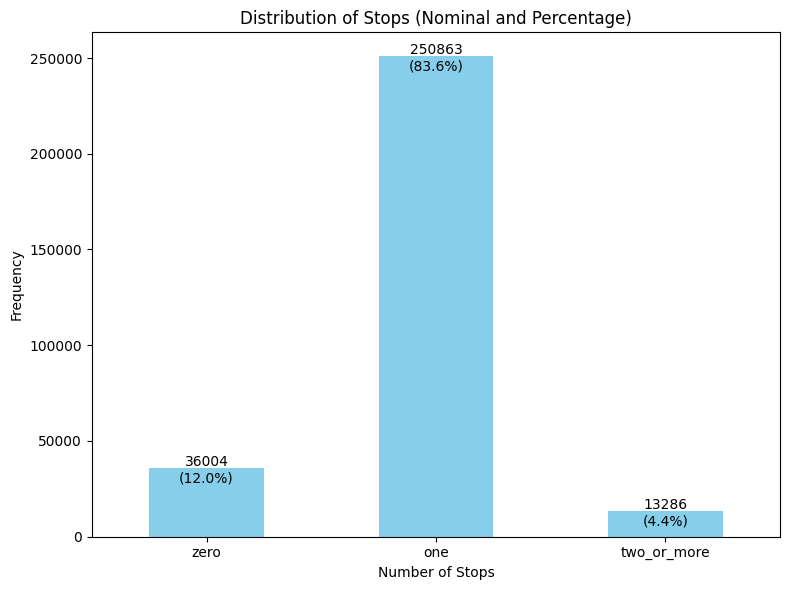

In [ ]:
import pandas as pd

stops_counts = data1['stops'].value_counts()
stops_counts=stops_counts.reindex(['zero','one','two_or_more'])
stops_percentage = (stops_counts / len(data1)) * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = stops_counts.plot(kind='bar', color='skyblue')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}\n({p.get_height() / len(data1) * 100:.1f}%)', (x + width/2, y + height-9000), ha='center', va='bottom')

plt.title('Distribution of Stops (Nominal and Percentage)')
plt.xlabel('Number of Stops')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

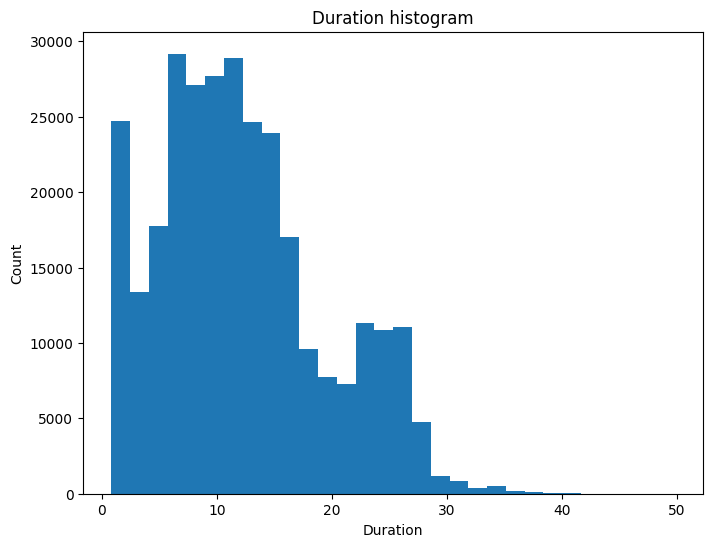

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data1['duration'],bins=30)
plt.title('Duration histogram')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

uAirline=data1["airline"].unique()
print(uAirline)


['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


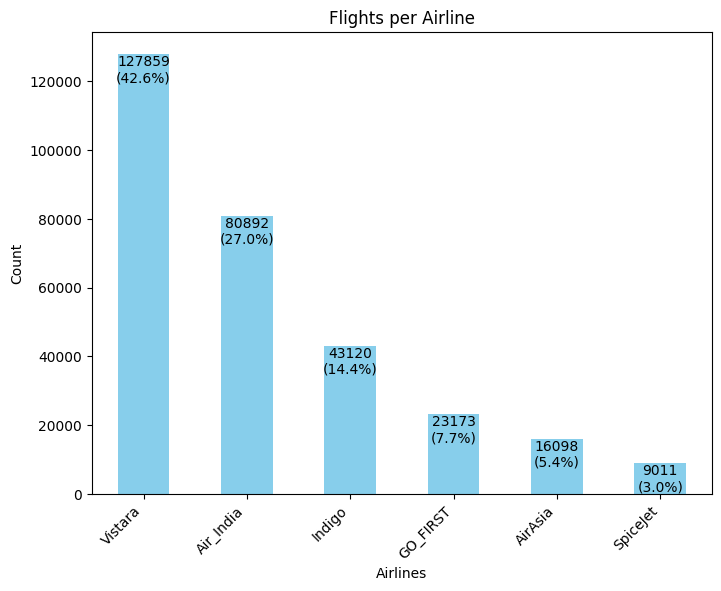

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
plt.figure(figsize=(8, 6))
airline_counts = data1['airline'].value_counts()
airline_percentage = (airline_counts / len(data1)) * 100

ax = airline_counts.plot(kind='bar', color='skyblue')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}\n({p.get_height() / len(data1) * 100:.1f}%)', (x + width/2, y + height-9000), ha='center', va='bottom')

plt.title('Flights per Airline')
plt.ylabel('Count')
plt.xlabel('Airlines')
plt.xticks(rotation=45, ha='right')
plt.show()

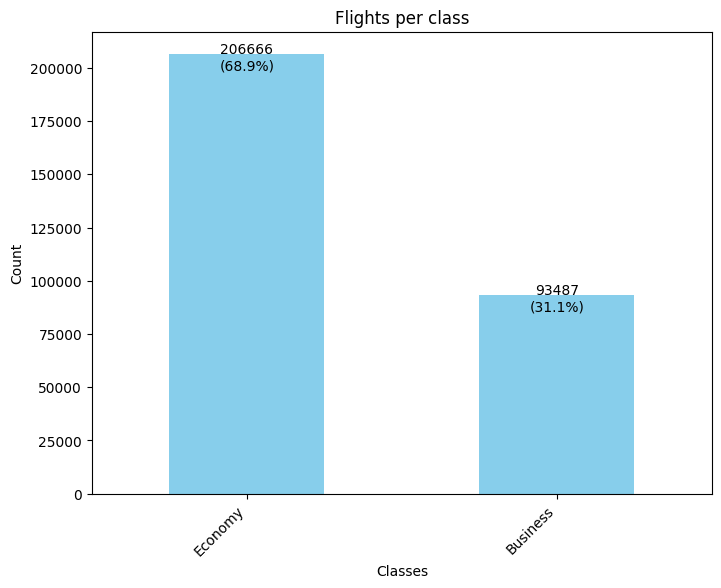

In [ ]:
classes_cnt = data1['class'].value_counts()
classes_perc = (classes_cnt / len(data1)) * 100
plt.figure(figsize=(8, 6))
ax = classes_cnt.plot(kind='bar', color='skyblue')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}\n({p.get_height() / len(data1) * 100:.1f}%)', (x + width/2, y + height-9000), ha='center', va='bottom')

plt.title('Flights per class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Classes')
plt.show()

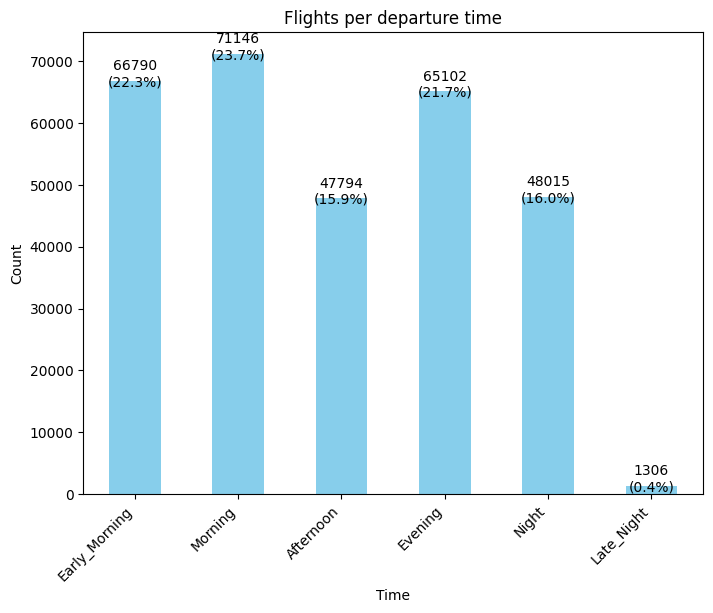

In [ ]:
departure_time_cnt = data1['departure_time'].value_counts()
departure_time_perc = (departure_time_cnt / len(data1)) * 100
departure_time_cnt=departure_time_cnt.reindex(['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])

plt.figure(figsize=(8, 6))
ax = departure_time_cnt.plot(kind='bar', color='skyblue')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}\n({p.get_height() / len(data1) * 100:.1f}%)', (x + width/2, y + height-1300), ha='center', va='bottom')


plt.title('Flights per departure time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks(rotation=45, ha='right')
plt.show()

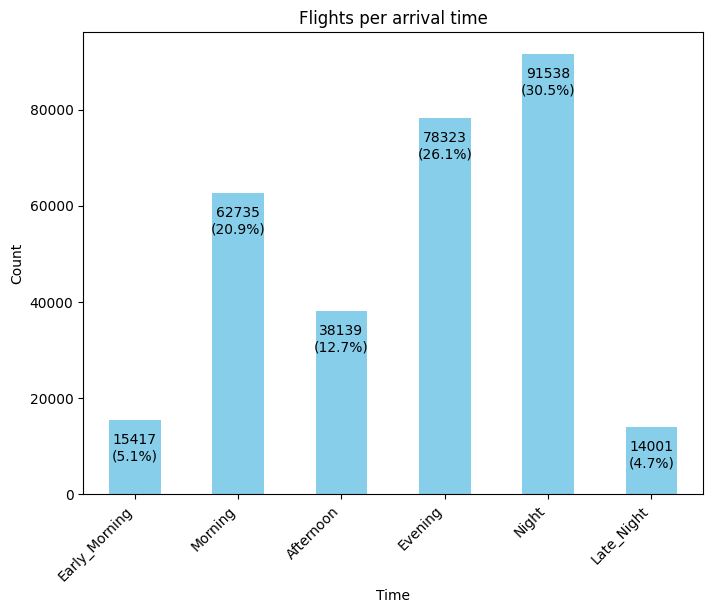

In [ ]:
arrival_time_cnt=data1["arrival_time"].value_counts()

arrival_time_perc = (arrival_time_cnt / len(data1)) * 100
arrival_time_cnt=arrival_time_cnt.reindex(['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])

plt.figure(figsize=(8, 6))
ax = arrival_time_cnt.plot(kind='bar', color='skyblue')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}\n({p.get_height() / len(data1) * 100:.1f}%)', (x + width/2, y + height-9000), ha='center', va='bottom')

plt.title('Flights per arrival time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(120.72222222222221, 0.5, 'Source City')

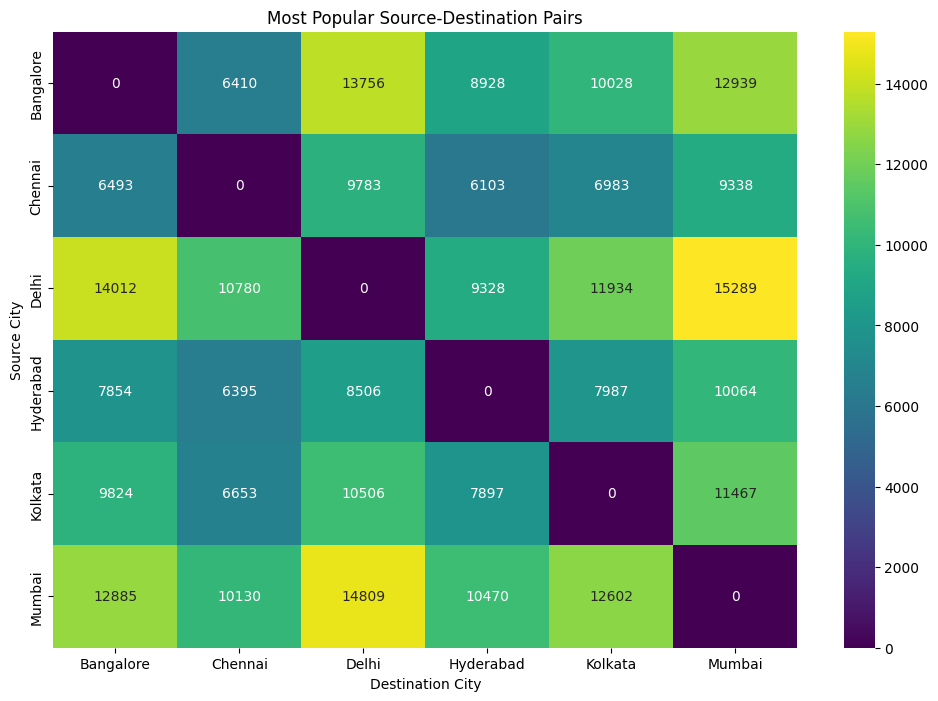

In [ ]:
city_pairs = pd.crosstab(data1['source_city'], data1['destination_city'])
plt.figure(figsize=(12, 8))
sns.heatmap(city_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Source-Destination Pairs")
plt.xlabel("Destination City")
plt.ylabel("Source City")

Text(120.58159722222221, 0.5, 'Arrival Time')

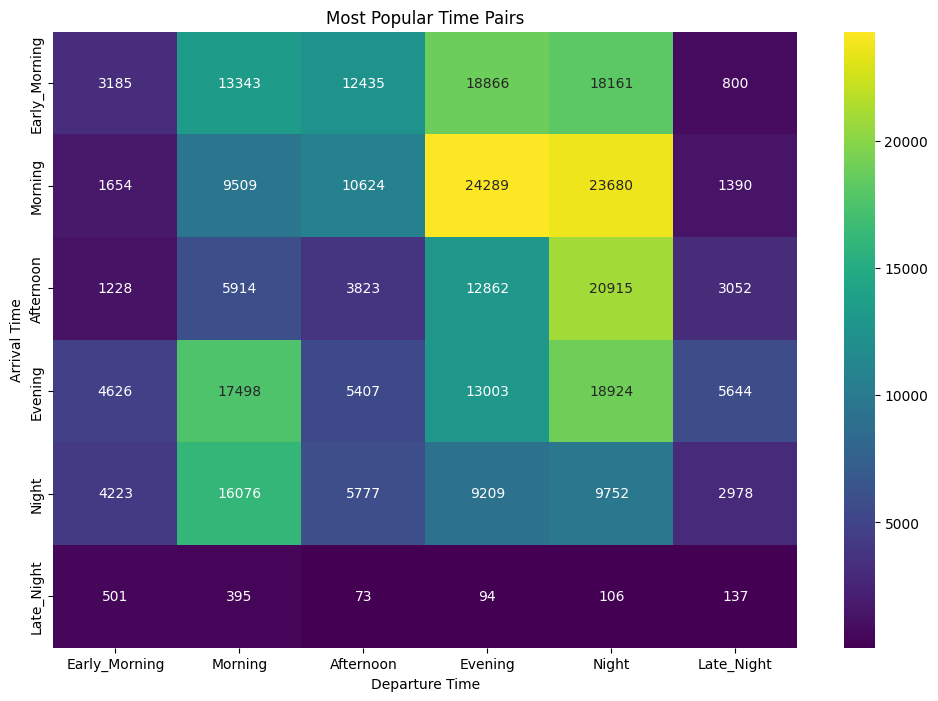

In [ ]:
time_pairs = pd.crosstab(data1['departure_time'], data1['arrival_time'])
new_order = ['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night']
time_pairs=time_pairs.reindex(index=new_order, columns=new_order)

plt.figure(figsize=(12, 8))
sns.heatmap(time_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Time Pairs")
plt.xlabel("Departure Time")
plt.ylabel("Arrival Time")

##Transforming Data

Mapping words to numbers for columns: departure time, arival time and stops.

In [ ]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(['zero','one','two_or_more'])
data['stops'] = le.transform(data['stops'])
le.fit(['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night'])
data['departure_time'] = le.transform(data['departure_time'])
data['arrival_time'] = le.transform(data['arrival_time'])

from sklearn.preprocessing import LabelBinarizer
bi=LabelBinarizer()
data['class']=bi.fit_transform(data['class'])

data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,2,2,5,Mumbai,1,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,1,2,4,Mumbai,1,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,1,2,1,Mumbai,1,2.17,1,5956
3,3,Vistara,UK-995,Delhi,4,2,0,Mumbai,1,2.25,1,5955
4,4,Vistara,UK-963,Delhi,4,2,4,Mumbai,1,2.33,1,5955


Mapping numbers to cyclical variables for arrival and departure time.

In [ ]:
import numpy as np

def cyclical_encoding(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

data = cyclical_encoding(data, 'departure_time', 6)
data = cyclical_encoding(data, 'arrival_time', 6)

data = data.drop(['departure_time', 'arrival_time'], axis=1)

data.head()

,Unnamed: 0,airline,flight,source_city,stops,destination_city,class,duration,days_left,price,departure_time_sin,departure_time_cos,arrival_time_sin,arrival_time_cos
0,0,SpiceJet,SG-8709,Delhi,2,Mumbai,1,2.17,1,5953,0.866025,-0.5,-0.866025,0.5
1,1,SpiceJet,SG-8157,Delhi,2,Mumbai,1,2.33,1,5953,0.866025,0.5,-0.866025,-0.5
2,2,AirAsia,I5-764,Delhi,2,Mumbai,1,2.17,1,5956,0.866025,0.5,0.866025,0.5
3,3,Vistara,UK-995,Delhi,2,Mumbai,1,2.25,1,5955,-0.866025,-0.5,0.000000,1.0
4,4,Vistara,UK-963,Delhi,2,Mumbai,1,2.33,1,5955,-0.866025,-0.5,-0.866025,-0.5


Mapping classes to dummy variables for airline, source and destination city.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

enc.fit(data[['airline','source_city','destination_city']])
dt=enc.transform(data[['airline','source_city','destination_city']])
dt=pd.DataFrame(dt, columns=enc.get_feature_names_out(['airline', 'source_city', 'destination_city']))

data=pd.concat([data,dt],axis=1)
data = data.drop(['airline', 'source_city', 'destination_city'], axis=1)

data.head()



,Unnamed: 0,flight,stops,class,duration,days_left,price,departure_time_sin,departure_time_cos,arrival_time_sin,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,SG-8709,2,1,2.17,1,5953,0.866025,-0.5,-0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,SG-8157,2,1,2.33,1,5953,0.866025,0.5,-0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,I5-764,2,1,2.17,1,5956,0.866025,0.5,0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,UK-995,2,1,2.25,1,5955,-0.866025,-0.5,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,UK-963,2,1,2.33,1,5955,-0.866025,-0.5,-0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Dropping unused data and spliting dataset for trainig and test subsets.

In [ ]:
data=data.drop(["Unnamed: 0","flight","days_left"],axis=1)
X=data.drop(["duration"],axis=1)
y=data["duration"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )
X_train.head()

,stops,class,price,departure_time_sin,departure_time_cos,arrival_time_sin,arrival_time_cos,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
105830,0,1,3393,0.866025,-0.5,1.224647e-16,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75202,0,1,4674,0.866025,-0.5,0.000000e+00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29821,2,1,5955,-0.866025,-0.5,0.000000e+00,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
232140,0,0,66928,-0.866025,-0.5,8.660254e-01,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
289259,0,0,60865,0.866025,0.5,8.660254e-01,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train.head()

,duration
105830,10.00
75202,18.08
29821,2.17
232140,6.58
289259,9.75


#Visualization of data

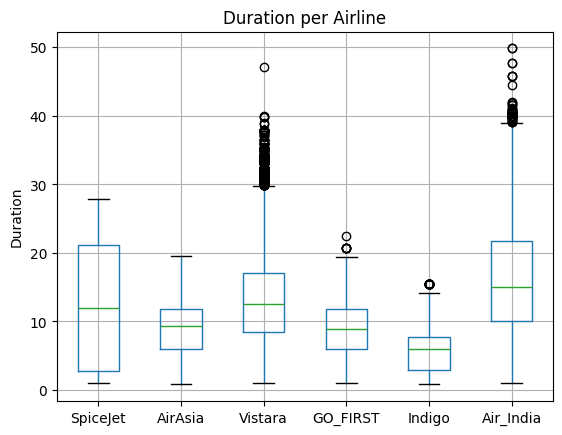

In [ ]:
airline=data1.groupby('airline')
air={}
for i in uAirline:
  air[i]=airline.get_group(i)['duration']
df = pd.DataFrame(air)
df.boxplot()
plt.title('Duration per Airline')
plt.ylabel('Duration')
plt.show()

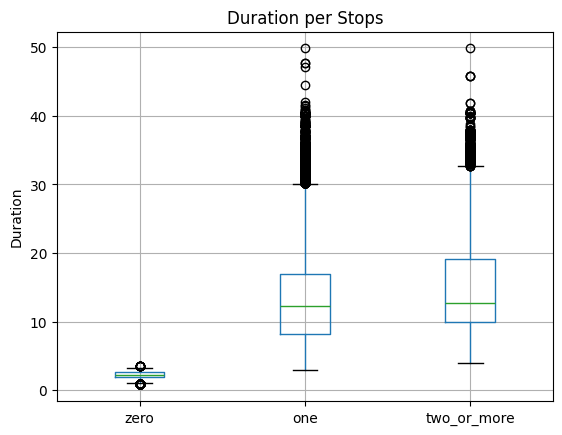

In [ ]:
stops=data1.groupby('stops')
sto={}
uStops=data1["stops"].unique()
for i in uStops:
  sto[i]=stops.get_group(i)['duration']
df = pd.DataFrame(sto)
df.boxplot()
plt.title('Duration per Stops')
plt.ylabel('Duration')
plt.show()

We can see that flights with no stops have much different range of values than with one and more stops. But at the other hand there is no much difference between "one" and "two or more".

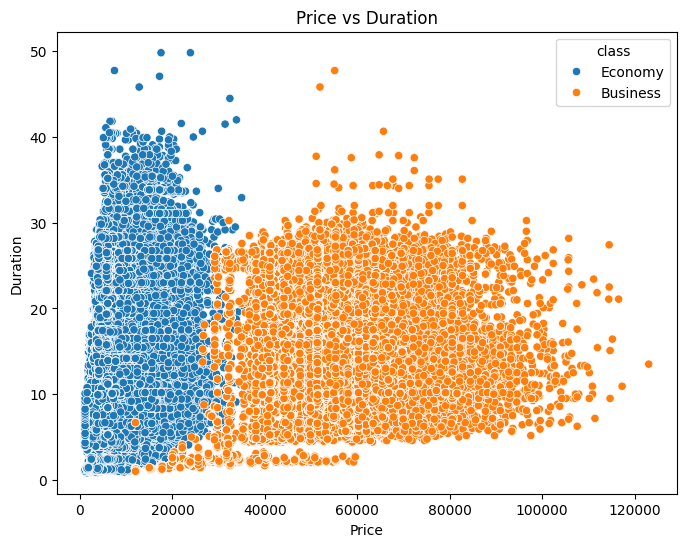

In [ ]:

plt.figure(figsize=(8, 6))

sns.scatterplot(data = data1, x='price', y='duration', hue='class')
plt.title('Price vs Duration')
plt.xlabel('Price')
plt.ylabel('Duration')
plt.show()

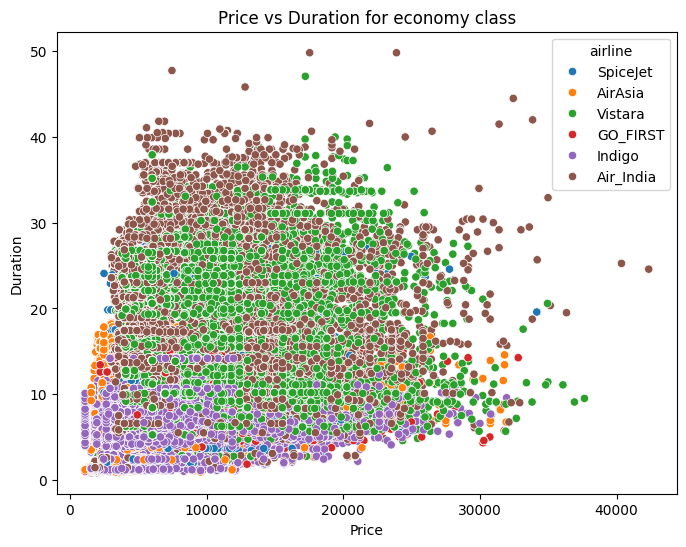

In [ ]:
airlines=data1.groupby('class')

plt.figure(figsize=(8, 6))
sns.scatterplot(data = airlines.get_group("Economy"), x='price', y='duration', hue='airline')
plt.title('Price vs Duration for economy class')
plt.xlabel('Price')
plt.ylabel('Duration')
plt.show()

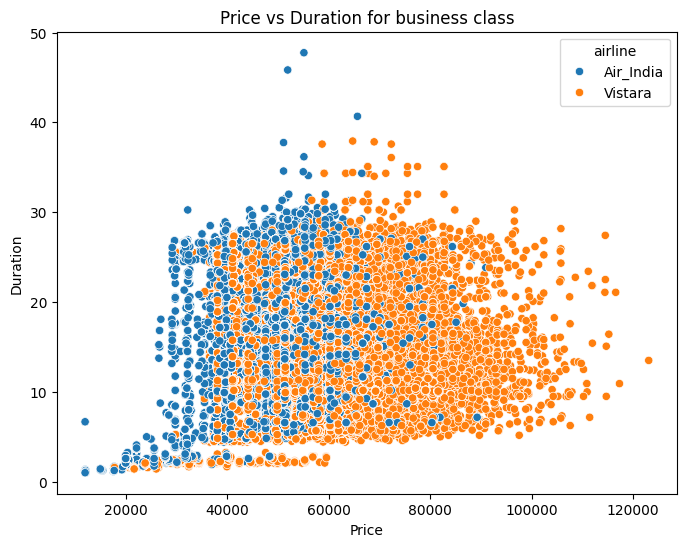

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = airlines.get_group("Business"), x='price', y='duration', hue='airline')
plt.title('Price vs Duration for business class')
plt.xlabel('Price')
plt.ylabel('Duration')
plt.show()

<Axes: >

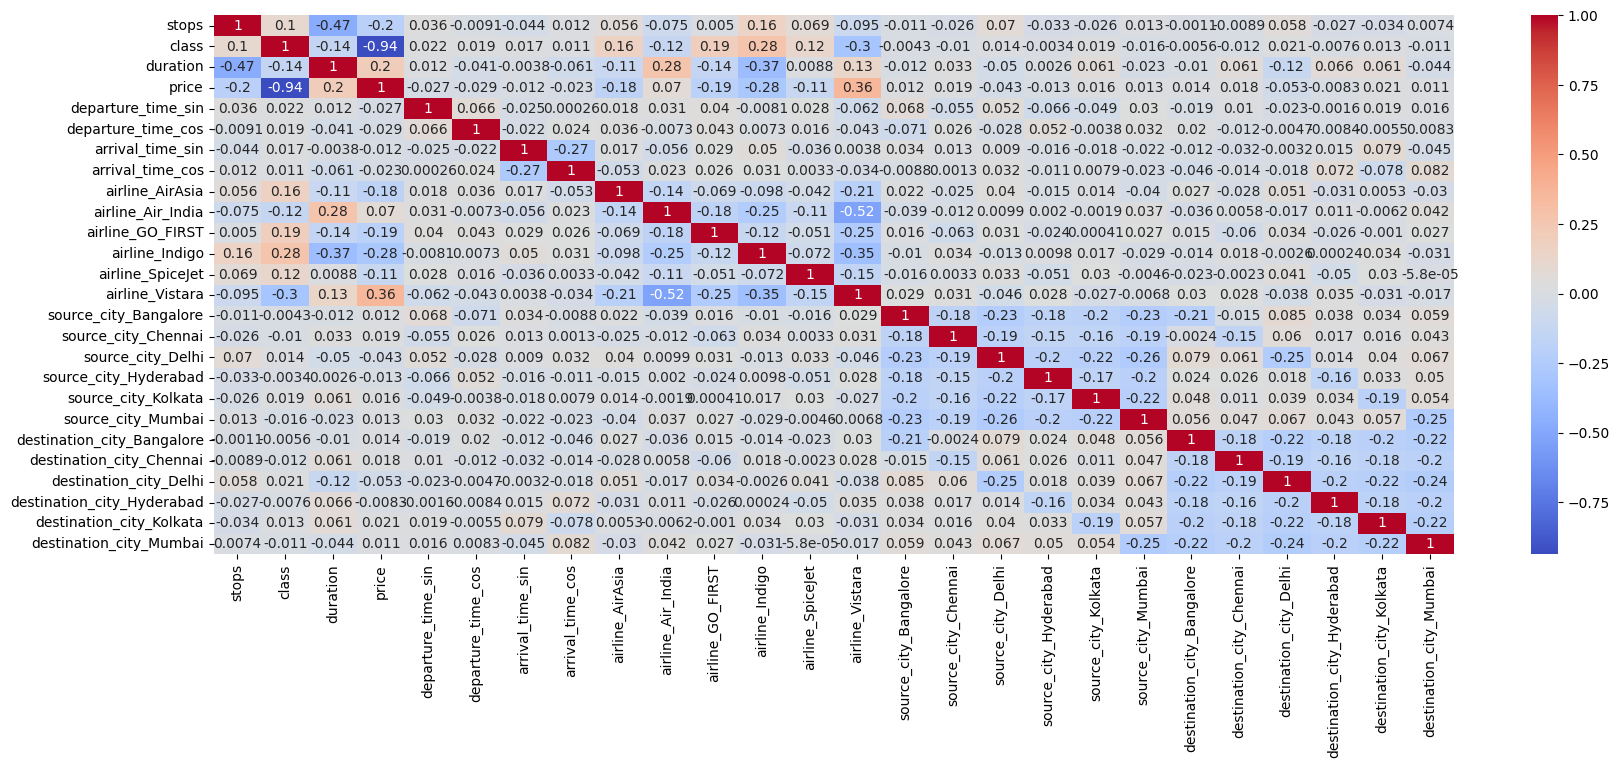

In [ ]:
corr = data.corr()
plt.figure(figsize=(20, 7))
sns.heatmap(corr,cmap="coolwarm",annot=True)

<Axes: >

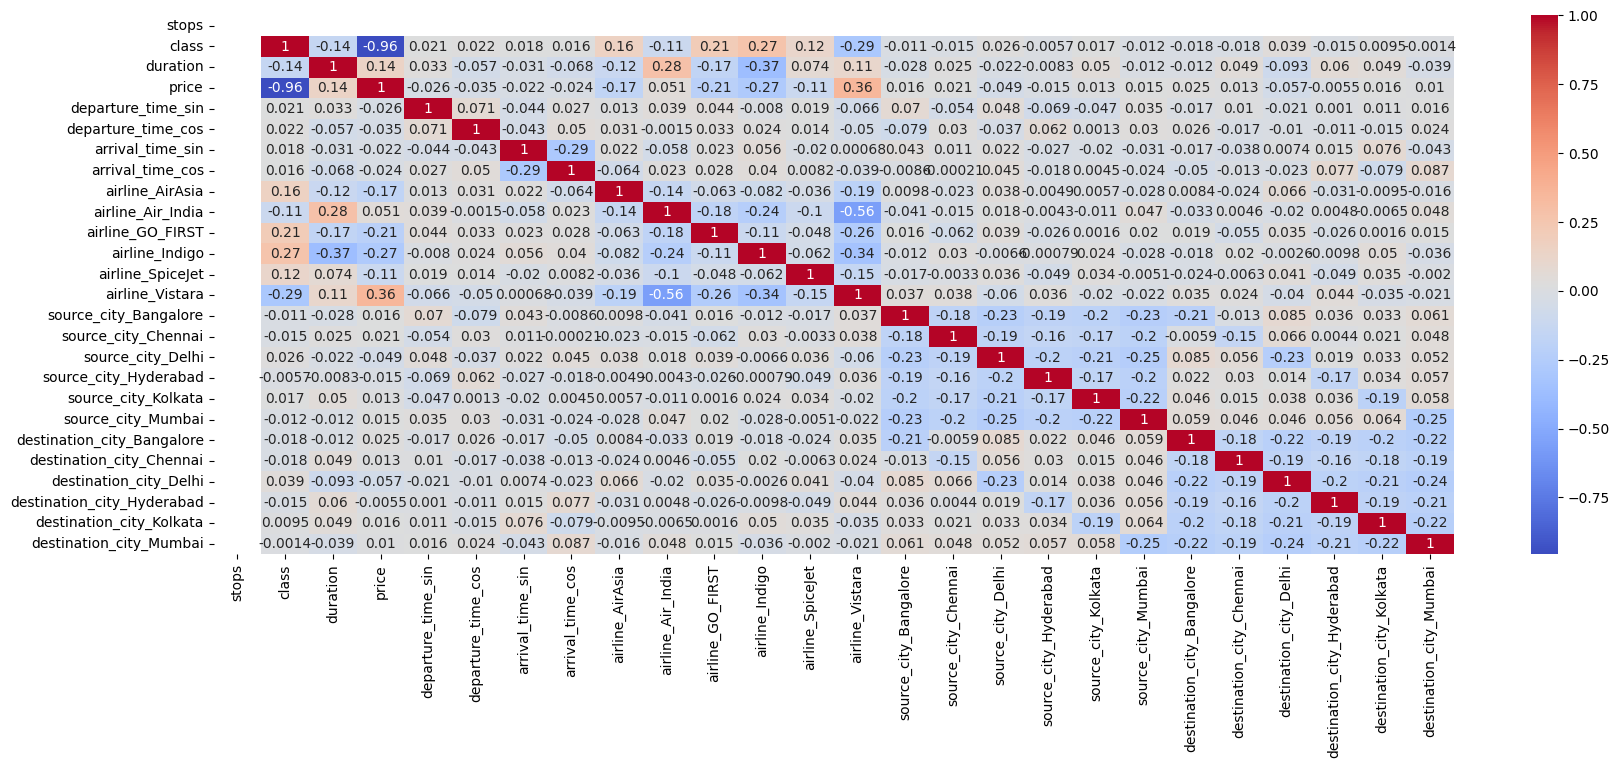

In [ ]:
zero_stop=data.groupby('stops')
zero_stop=zero_stop.get_group(0)
corr2 = zero_stop.corr()
plt.figure(figsize=(20, 7))
sns.heatmap(corr2,cmap="coolwarm",annot=True)

#Deletion of outliers

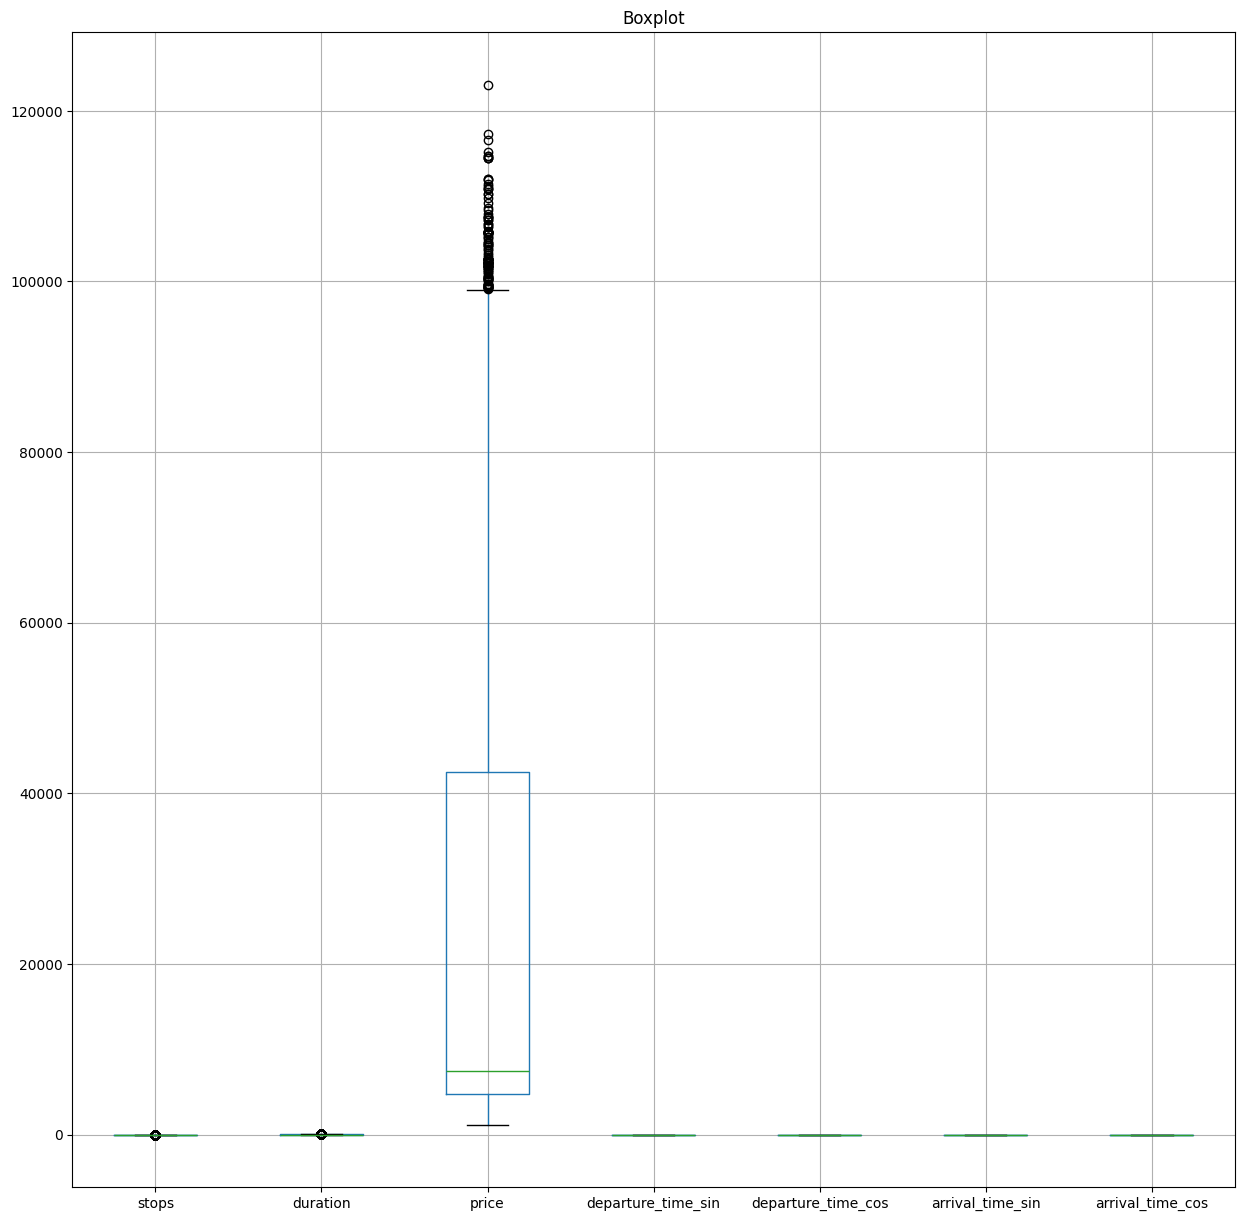

In [ ]:
data[['stops','duration','price','departure_time_sin','departure_time_cos','arrival_time_sin','arrival_time_cos']].boxplot(figsize=(15, 15))
plt.title('Boxplot')
plt.show()

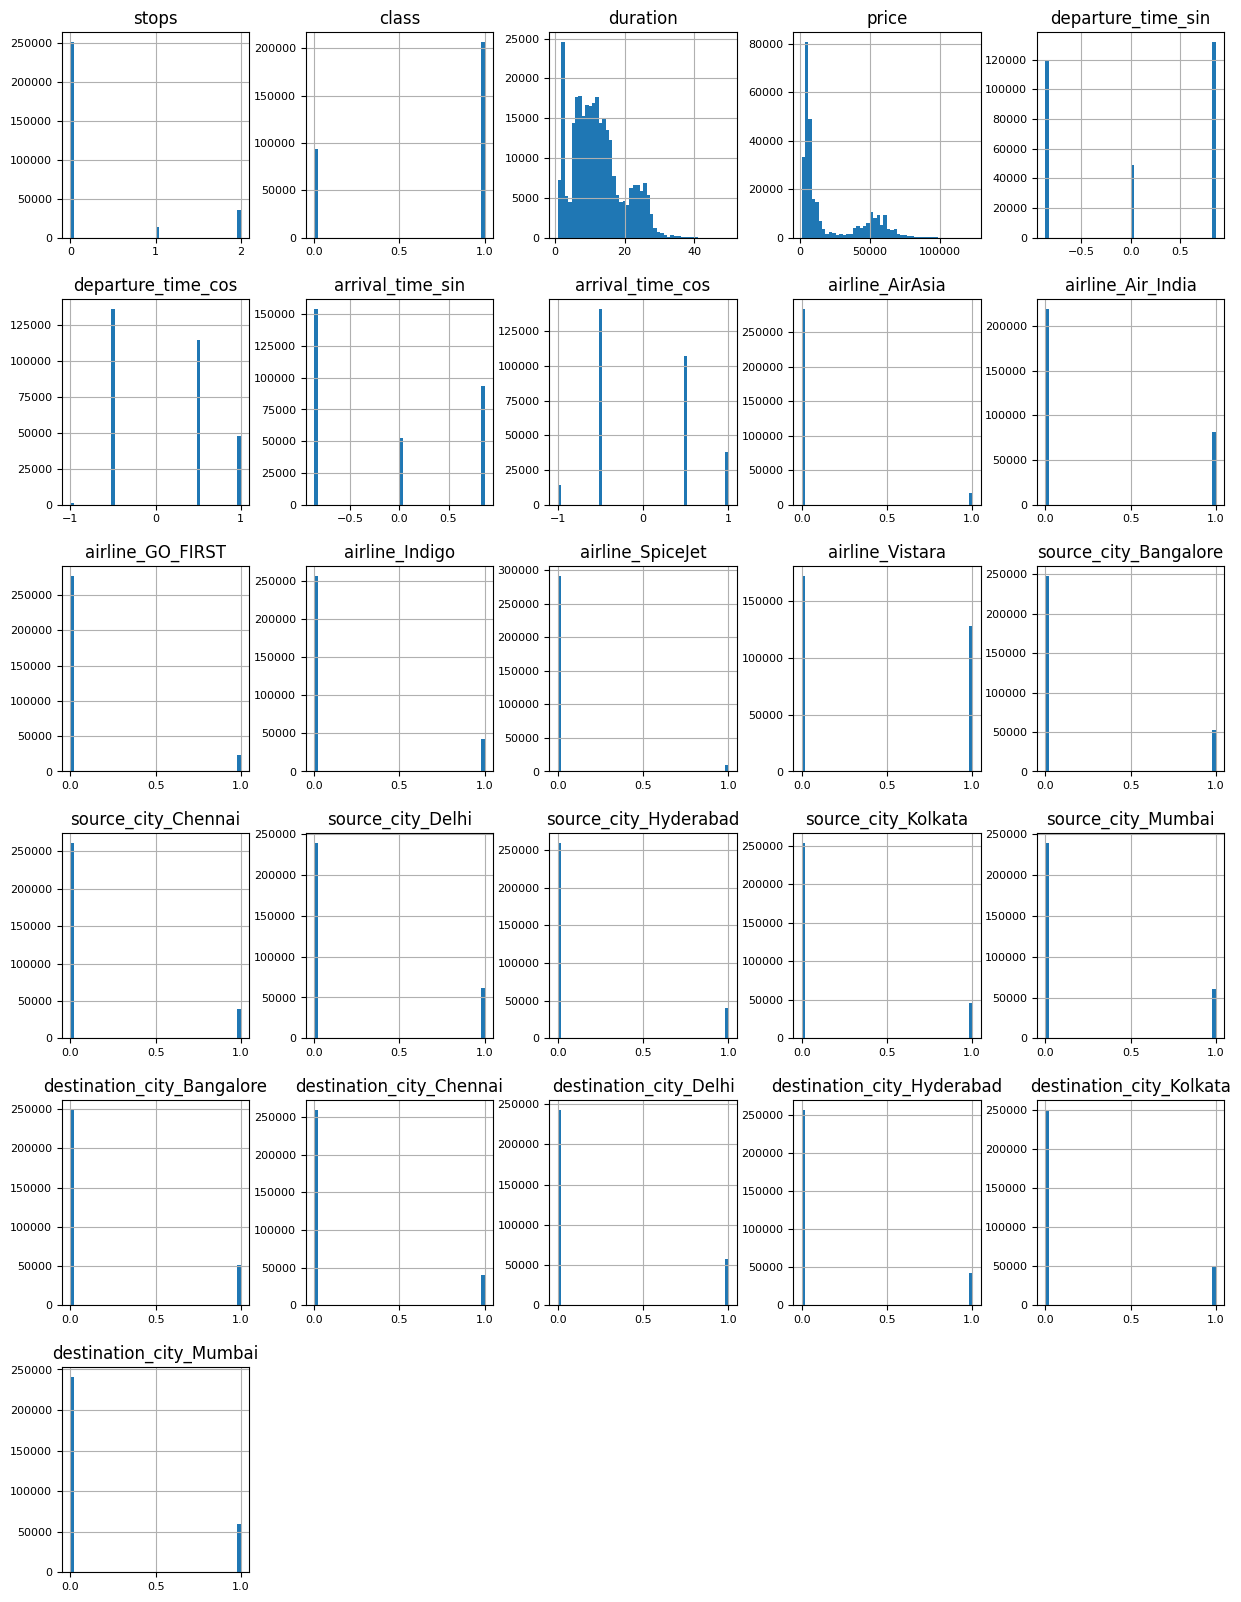

In [ ]:
data.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [ ]:
price_low = X_train['price'].quantile(0.1) # get 1st percentile
price_hi = X_train['price'].quantile(0.99) # get 99th percentile
X_train_filtred = X_train[(X_train['price'] < price_hi) & (X_train['price'] > price_low)]
y_train_filtred = y_train[(X_train['price'] < price_hi) & (X_train['price'] > price_low)]

In [ ]:
low = y_train.quantile(0.1) # get 1st percentile
hi = y_train.quantile(0.99) # get 99th percentile
X_train_filtred2= X_train[(y_train < hi) & (y_train> low)]
y_train_filtred = y_train[(y_train< hi) & (y_train > low)]

In [ ]:
zero=y_train[X_train["stops"]==0]
one=y_train[X_train["stops"]==1]
two=y_train[X_train["stops"]==2]

z_low = zero.quantile(0.1) # get 1st percentile
z_hi = zero.quantile(0.99) # get 99th percentile
o_low = one.quantile(0.1) # get 1st percentile
o_hi = one.quantile(0.99) # get 99th percentile
t_low = two.quantile(0.1) # get 1st percentile
t_hi = two.quantile(0.99) # get 99th percentile

X_train_filtred2= X_train[((X_train["stops"]==0) & (y_train < z_hi) & (y_train> z_low))|((X_train["stops"]==1 )& (y_train < o_hi) & (y_train> o_low))|((X_train["stops"]==2) & (y_train < t_hi) & (y_train> t_low))]
y_train_filtred2= y_train[((X_train["stops"]==0) & (y_train < z_hi) & (y_train> z_low))|((X_train["stops"]==1 )& (y_train < o_hi) & (y_train> o_low))|((X_train["stops"]==2) & (y_train < t_hi) & (y_train> t_low))]

#PCA data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().set_output(transform="pandas").fit(X_train)
data_pca = pca.transform(X_train)
data_pca_v = pca.transform(X_valid)

In [ ]:
pca = PCA().set_output(transform="pandas").fit(X_train_filtred)
data_pca = pca.transform(X_train_filtred)
data_pca_v = pca.transform(X_valid)

#Creating model

In [ ]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(10, 5), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

6.0849865565750765
6.089236256417806


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#reg = tree.ExtraTreeRegressor(random_state=1,max_depth=41)
reg= KNeighborsRegressor(n_neighbors=10)
reg.fit(data_pca, y_train)
y_pred_train = reg.predict(data_pca)
y_pred = reg.predict(data_pca_v)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

3.4598349275755655
3.875549798324495


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
reg = tree.DecisionTreeRegressor(random_state=1,max_depth=40)
#reg= KNeighborsRegressor(n_neighbors=10)

reg.fit(X_train_filtred2, y_train_filtred2)
y_pred_train = reg.predict(X_train_filtred2)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train_filtred2)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

0.858099742885495
3.6400063236078797


tree max depth 40 - 1.128, 2.0807

Extra tree max depth 41 - 1.1372, 2.0687

KNeighbours n_neighbours = 2 - 2.0379, 3.3731

KNeighbours n_neigbours = 10 - 3.4598, 3.8755

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(10, 5), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(data_pca, y_train_filtred)
y_pred_train = reg.predict(data_pca)
y_pred = reg.predict(data_pca_v)
rmse = np.sqrt(np.mean((y_pred_train - y_train_filtred)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

7.398914671710277
8.023983866930338


zero stops

In [ ]:
from sklearn import tree
Xz=zero_stop.drop(["duration",'stops'],axis=1)
yz=zero_stop["duration"]

Xz_train, Xz_test, yz_train, yz_test= train_test_split(Xz, yz, test_size=0.4,random_state=1 )
Xz_valid, Xz_test, yz_valid, yz_test= train_test_split(Xz_test, yz_test, test_size=0.5,random_state=1 )

reg = tree.DecisionTreeRegressor(random_state=1,max_depth=40)
reg.fit(Xz_train, yz_train)
y_pred_train = reg.predict(Xz_train)
y_pred = reg.predict(Xz_valid)
rmse = np.sqrt(np.mean((y_pred_train - yz_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - yz_valid)**2))
print(rmse)

1.2025884286053001
2.1736895258243454


max_depth 50 = 1.2026, 2.18

max_depth 40 = 1.2025, 2.1737

#Project task

We chosen dataset for Flight Price Prediction

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

Our project centers on the topic of flight duration prediction.

While traditional approaches in transportation forecasting have largely concentrated on price predictions, we seek to shift the focus towards predicting travel time.
This fresh perspective aims to omprove the travel experience by providing insights that are crucial for passengers planning their journeys.

To achieve this, we will analyze a dataset featuring key attributes such as airline, destination city, departure city, class, departure time, and price—all accessible to potential passengers during the booking process.

We aspire to equip travelers with the tools they need to make informed decisions and effectively minimize their time in the air.

We want to know how to predict duration of a flight, based on features like place of origin, airline,	departure time, stops,	destination city,	class, price.

Questions:

  - Does duration changes if flight starts during the day or at night.
  -
